# Preprocesamiento

1. Descripción de dataframe
2. Evaluación de datos faltantes (missings)
3. Eliminación de patrones o atributos con valores ausentes
4. Imputación de variables numéricas (Simple Inputer + KNN inputer)
5. Inputación de variables categórica
6. Dummies
7. Agrupamiento de variables categóricas
8. Transformar la variable objetivo ("y") para que tenga aspecto de distribución normal.
9. Binning (discretización)
10. Normalizar los datos (algoritmo: standard scaler) + Label Enconder (codificar tu "y" cuando es categórica).



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_excel("chronickidney.xlsx")


#1. Descripción de dataframe

In [2]:
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


# 2. Evaluación de datos faltantes (missings)

In [3]:
#replace
df.replace("?", np.nan, inplace=True)
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [5]:
df.isnull().sum()/len(df)*100 #porcentaje de nans de cada columna

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wc       26.50
rc       32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
class     0.00
dtype: float64

In [6]:
df.shape

(400, 25)

In [7]:
df2= df.copy()
df2.dropna(axis=0, inplace=True) #Si alguna fila tiene un Nan se elimina la fila

In [8]:
df2.shape

(158, 25)

In [9]:
df2= df.copy()
df2.dropna(axis=1, inplace=True) #Si alguna columna tiene un Nan se elimina la columna
df2.shape

(400, 1)

In [10]:
df2= df.copy()
df2.dropna(axis=0, how="all", inplace=True) #Si toda la fila tiene Nans se elimina la fila
df2.shape

(400, 25)

In [11]:
df2= df.copy()
df2.dropna(axis=0, thresh=25, inplace=True) #Elimina las filas de un DF que contienen menos de 15 valores NaN
df2.shape

(158, 25)

In [12]:
df2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [13]:
columns_perc = df.isnull().sum()/len(df)*100

In [14]:
columns_perc[columns_perc>15]

rbc    38.00
pc     16.25
sod    21.75
pot    22.00
pcv    17.75
wc     26.50
rc     32.75
dtype: float64

In [15]:
columns_perc[columns_perc>15].index.values

array(['rbc', 'pc', 'sod', 'pot', 'pcv', 'wc', 'rc'], dtype=object)

In [16]:
df.drop(columns=columns_perc[columns_perc>15].index.values, inplace=True)

#3. Eliminación de patrones o atributos con valores ausentes

In [17]:
#Eliminar duplicados

df2 = df.copy()
df2 = pd.concat([df, df.loc[0:1]])
df2.shape
df2

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,notpresent,notpresent,NaN,18.0,0.8,11.3,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,notpresent,notpresent,423.0,53.0,1.8,9.6,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,present,notpresent,117.0,56.0,3.8,11.2,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,notpresent,notpresent,106.0,26.0,1.4,11.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,12.0,80.0,1.020,0.0,0.0,notpresent,notpresent,100.0,26.0,0.6,15.8,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,notpresent,notpresent,114.0,50.0,1.0,14.2,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,notpresent,notpresent,131.0,18.0,1.1,15.8,no,no,no,good,no,no,notckd
0,48.0,80.0,1.020,1.0,0.0,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,ckd


In [18]:
df2.tail()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
397,12.0,80.0,1.020,0.0,0.0,notpresent,notpresent,100.0,26.0,0.6,15.8,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,notpresent,notpresent,114.0,50.0,1.0,14.2,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,notpresent,notpresent,131.0,18.0,1.1,15.8,no,no,no,good,no,no,notckd
0,48.0,80.0,1.020,1.0,0.0,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,notpresent,notpresent,NaN,18.0,0.8,11.3,no,no,no,good,no,no,ckd


In [19]:
df2.drop_duplicates(keep="first", inplace=True)
df2.head()
df2.tail()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
395,55.0,80.0,1.020,0.0,0.0,notpresent,notpresent,140.0,49.0,0.5,15.7,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,notpresent,notpresent,75.0,31.0,1.2,16.5,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,notpresent,notpresent,100.0,26.0,0.6,15.8,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,notpresent,notpresent,114.0,50.0,1.0,14.2,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,notpresent,notpresent,131.0,18.0,1.1,15.8,no,no,no,good,no,no,notckd


In [20]:
#Divisióin entre variables categóricas y numéricas
df

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,notpresent,notpresent,NaN,18.0,0.8,11.3,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,notpresent,notpresent,423.0,53.0,1.8,9.6,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,present,notpresent,117.0,56.0,3.8,11.2,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,notpresent,notpresent,106.0,26.0,1.4,11.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,notpresent,notpresent,140.0,49.0,0.5,15.7,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,notpresent,notpresent,75.0,31.0,1.2,16.5,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,notpresent,notpresent,100.0,26.0,0.6,15.8,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,notpresent,notpresent,114.0,50.0,1.0,14.2,no,no,no,good,no,no,notckd


In [21]:
df.replace("?", np.nan, inplace=True)
df.head(5)

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,notpresent,notpresent,NaN,18.0,0.8,11.3,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,notpresent,notpresent,423.0,53.0,1.8,9.6,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,present,notpresent,117.0,56.0,3.8,11.2,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,notpresent,notpresent,106.0,26.0,1.4,11.6,no,no,no,good,no,no,ckd


In [22]:
df._get_numeric_data()

,age,bp,sg,al,su,bgr,bu,sc,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,11.6
...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,15.7
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,16.5
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,15.8
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,14.2


In [23]:
lista_numericas=df._get_numeric_data().columns

In [24]:
lista_numericas

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'hemo'], dtype='object')

In [25]:
df_num = df[lista_numericas]
df_num.head(5)

,age,bp,sg,al,su,bgr,bu,sc,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,11.6


In [26]:
df_cat = df.drop(columns=lista_numericas)
df_cat.head(5)

,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,notpresent,notpresent,no,no,no,good,no,no,ckd
2,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,notpresent,notpresent,no,no,no,good,no,no,ckd


In [27]:
df=pd.read_excel("chronickidney.xlsx")
df.replace("?", np.nan, inplace=True)
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [28]:
lista_numericas=df._get_numeric_data().columns
lista_numericas

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'rc'],
      dtype='object')

In [29]:
df_num = df[lista_numericas]
df_num.head(5)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,4.6


In [30]:
df_cat = df.drop(columns=lista_numericas)
df_cat.head(5)

,rbc,pc,pcc,ba,pcv,wc,htn,dm,cad,appet,pe,ane,class
0,NaN,normal,notpresent,notpresent,44,7800,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,no,no,no,good,no,no,ckd


In [31]:
list_num = ["pcv", "wc"]
df_cat = df_cat.drop(list_num, axis=1)
df_cat.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [32]:
df_num = pd.concat([df_num, df[list_num]], axis=1)
df_num.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,5.2,44,7800
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,NaN,38,6000
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,NaN,31,7500
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,3.9,32,6700
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,4.6,35,7300


#Imputación de variables numéricas (Simple Inputer + KNN inputer)

In [33]:
df_num.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,5.2,44,7800
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,NaN,38,6000
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,NaN,31,7500
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,3.9,32,6700
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,4.6,35,7300


In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer (missing_values=np.nan, strategy="mean")
imputer.fit(df_num)
df_num_imp = imputer.transform(df_num)
df_num_imp

array([[4.80000000e+01, 8.00000000e+01, 1.02000000e+00, ...,
        5.20000000e+00, 4.40000000e+01, 7.80000000e+03],
       [7.00000000e+00, 5.00000000e+01, 1.02000000e+00, ...,
        4.70743494e+00, 3.80000000e+01, 6.00000000e+03],
       [6.20000000e+01, 8.00000000e+01, 1.01000000e+00, ...,
        4.70743494e+00, 3.10000000e+01, 7.50000000e+03],
       ...,
       [1.20000000e+01, 8.00000000e+01, 1.02000000e+00, ...,
        5.40000000e+00, 4.90000000e+01, 6.60000000e+03],
       [1.70000000e+01, 6.00000000e+01, 1.02500000e+00, ...,
        5.90000000e+00, 5.10000000e+01, 7.20000000e+03],
       [5.80000000e+01, 8.00000000e+01, 1.02500000e+00, ...,
        6.10000000e+00, 5.30000000e+01, 6.80000000e+03]])

In [35]:
df_num_imp.shape

(400, 14)

In [36]:
df_num2= pd.DataFrame(df_num_imp, columns=df_num.columns)
df_num2.head(10)


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,48.0,80.000000,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,5.200000,44.0,7800.000000
1,7.0,50.000000,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,4.707435,38.0,6000.000000
2,62.0,80.000000,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,4.707435,31.0,7500.000000
3,48.0,70.000000,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,3.900000,32.0,6700.000000
4,51.0,80.000000,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,4.600000,35.0,7300.000000
5,60.0,90.000000,1.015,3.0,0.0,74.000000,25.0,1.1,142.000000,3.200000,12.2,4.400000,39.0,7800.000000
6,68.0,70.000000,1.010,0.0,0.0,100.000000,54.0,24.0,104.000000,4.000000,12.4,4.707435,36.0,8406.122449
7,24.0,76.469072,1.015,2.0,4.0,410.000000,31.0,1.1,137.528754,4.627244,12.4,5.000000,44.0,6900.000000
8,52.0,100.000000,1.015,3.0,0.0,138.000000,60.0,1.9,137.528754,4.627244,10.8,4.000000,33.0,9600.000000
9,53.0,90.000000,1.020,2.0,0.0,70.000000,107.0,7.2,114.000000,3.700000,9.5,3.700000,29.0,12100.000000


In [37]:
#KNN inputer

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_num_imp = imputer.fit_transform(df_num)
df_num_imp

array([[4.80000000e+01, 8.00000000e+01, 1.02000000e+00, ...,
        5.20000000e+00, 4.40000000e+01, 7.80000000e+03],
       [7.00000000e+00, 5.00000000e+01, 1.02000000e+00, ...,
        5.40000000e+00, 3.80000000e+01, 6.00000000e+03],
       [6.20000000e+01, 8.00000000e+01, 1.01000000e+00, ...,
        3.96666667e+00, 3.10000000e+01, 7.50000000e+03],
       ...,
       [1.20000000e+01, 8.00000000e+01, 1.02000000e+00, ...,
        5.40000000e+00, 4.90000000e+01, 6.60000000e+03],
       [1.70000000e+01, 6.00000000e+01, 1.02500000e+00, ...,
        5.90000000e+00, 5.10000000e+01, 7.20000000e+03],
       [5.80000000e+01, 8.00000000e+01, 1.02500000e+00, ...,
        6.10000000e+00, 5.30000000e+01, 6.80000000e+03]])

In [38]:
df_num = pd.DataFrame(df_num_imp, columns=df_num.columns)

In [39]:
df_num

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,139.0,4.533333,15.4,5.200000,44.0,7800.0
1,7.0,50.0,1.020,4.0,0.0,113.666667,18.0,0.8,137.0,4.000000,11.3,5.400000,38.0,6000.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.0,4.666667,9.6,3.966667,31.0,7500.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.500000,11.2,3.900000,32.0,6700.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,138.0,4.233333,11.6,4.600000,35.0,7300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.900000,15.7,4.900000,47.0,6700.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.500000,16.5,6.200000,54.0,7800.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.400000,15.8,5.400000,49.0,6600.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.900000,14.2,5.900000,51.0,7200.0


# 5. Inputación de variables categórica

In [40]:
df_cat

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer (missing_values=np.nan, strategy="most_frequent")
df_cat_imp = imputer.fit_transform(df_cat)
df_cat_imp

array([['normal', 'normal', 'notpresent', ..., 'no', 'no', 'ckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'ckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'yes', 'ckd'],
       ...,
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd']],
      dtype=object)

In [42]:
df_cat = pd.DataFrame(df_cat_imp, columns=df_cat.columns)
df_cat.head(10)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
5,normal,normal,notpresent,notpresent,yes,yes,no,good,yes,no,ckd
6,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
7,normal,abnormal,notpresent,notpresent,no,yes,no,good,yes,no,ckd
8,normal,abnormal,present,notpresent,yes,yes,no,good,no,yes,ckd
9,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes,ckd


#6. Dummies

In [43]:
#agregar dummies en donde la columna pasara a formar parte del dataframe df_num
pd.get_dummies(df_cat["pc"], dtype="int")


,abnormal,normal
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
395,0,1
396,0,1
397,0,1
398,0,1


In [44]:
df_cat

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [45]:
df_cat["cad"].value_counts()

cad
no      364
yes      34
\tno      2
Name: count, dtype: int64

In [46]:
df_cat["cad"] = df_cat["cad"].replace ("\tno", "no")

In [47]:
df_cat["cad"].value_counts()

cad
no     366
yes     34
Name: count, dtype: int64

#Agrupamiento de variables categóricas

#Transformar la variable objetivo ("y") para que tenga aspecto de distribución normal.

Text(0.5, 1.0, 'Histograma Y')

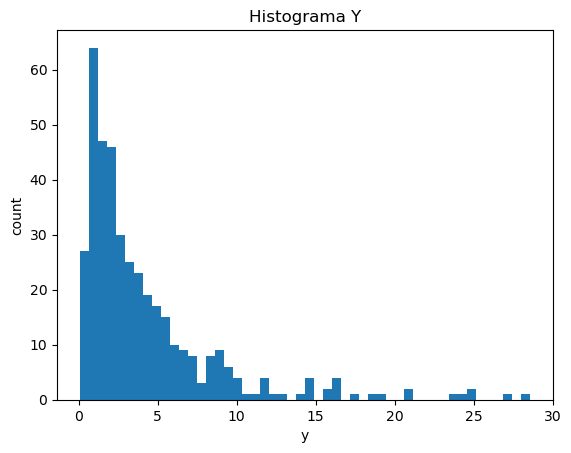

In [48]:
df_num["y"] = np.exp(np.random.normal(1,1,len(df_num)))
%matplotlib inline
plt.hist(df_num["y"].values,50)
plt.xlabel("y")
plt.ylabel("count")
plt.title("Histograma Y")

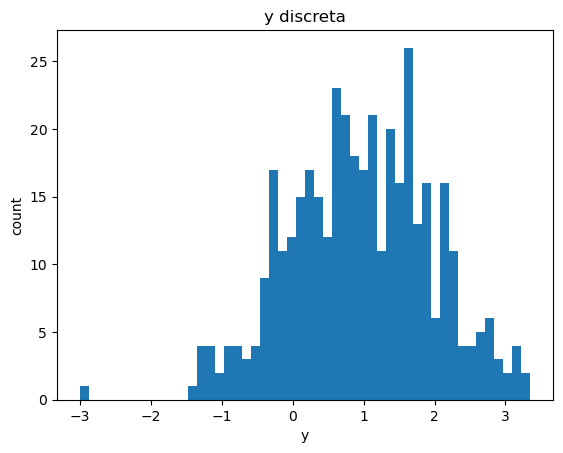

In [49]:
%matplotlib inline
plt.hist(np.log(df_num["y"].values), 50)
plt.xlabel("y")
plt.ylabel("count")
plt.title("y discreta")
plt.show()


a. transformamos la y
y_log = np.log(y)

b. ajustamos el modelo (idealmente con el train)
model.fit(X, y_log)

c. predecimos (idealmente con el test)
y_pred_log = model.predict(X)

e. transformamos la predicción a la escala original
y_pred=np.exp(y_pred_log)

f. medimos el error en la escala original
mean_squared_error(y, y_pred)


# 9. Binning (discretización)

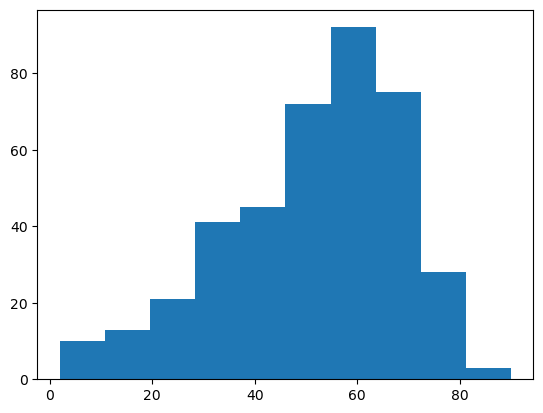

In [50]:
%matplotlib inline
plt.hist(df_num["age"].values)
plt.show()

In [51]:
bins = np.linspace(min(df["age"]), max(df["age"]), 4 )
bins

array([ 2.        , 31.33333333, 60.66666667, 90.        ])

In [52]:
bins = [2, 30, 60, 90]

In [53]:
categorias = ["joven", "EdadMedia", "AdultosMayores"]

In [54]:
pd.cut(df_num["age"], [2, 30, 60, 90], labels=categorias)
#cut (serie/columna, los cortes, las categorías)

0           EdadMedia
1               joven
2      AdultosMayores
3           EdadMedia
4           EdadMedia
            ...      
395         EdadMedia
396         EdadMedia
397             joven
398             joven
399         EdadMedia
Name: age, Length: 400, dtype: category
Categories (3, object): ['joven' < 'EdadMedia' < 'AdultosMayores']

In [55]:
df_num["age-binned"] = pd.cut(df_num["age"], bins, labels=categorias)
df_num.head(50)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc,y,age-binned
0,48.0,80.000000,1.020000,1.000000,0.000000,121.000000,36.000000,1.2,139.000000,4.533333,15.400000,5.200000,44.000000,7800.000000,8.693945,EdadMedia
1,7.0,50.000000,1.020000,4.000000,0.000000,113.666667,18.000000,0.8,137.000000,4.000000,11.300000,5.400000,38.000000,6000.000000,1.744059,joven
2,62.0,80.000000,1.010000,2.000000,3.000000,423.000000,53.000000,1.8,132.000000,4.666667,9.600000,3.966667,31.000000,7500.000000,0.843357,AdultosMayores
3,48.0,70.000000,1.005000,4.000000,0.000000,117.000000,56.000000,3.8,111.000000,2.500000,11.200000,3.900000,32.000000,6700.000000,10.308238,EdadMedia
4,51.0,80.000000,1.010000,2.000000,0.000000,106.000000,26.000000,1.4,138.000000,4.233333,11.600000,4.600000,35.000000,7300.000000,2.675884,EdadMedia
5,60.0,90.000000,1.015000,3.000000,0.000000,74.000000,25.000000,1.1,142.000000,3.200000,12.200000,4.400000,39.000000,7800.000000,2.253606,EdadMedia
6,68.0,70.000000,1.010000,0.000000,0.000000,100.000000,54.000000,24.0,104.000000,4.000000,12.400000,4.533333,36.000000,11266.666667,16.482219,AdultosMayores
7,24.0,66.666667,1.015000,2.000000,4.000000,410.000000,31.000000,1.1,135.000000,3.700000,12.400000,5.000000,44.000000,6900.000000,0.794012,joven
8,52.0,100.000000,1.015000,3.000000,0.000000,138.000000,60.000000,1.9,135.666667,5.300000,10.800000,4.000000,33.000000,9600.000000,1.129148,EdadMedia
9,53.0,90.000000,1.020000,2.000000,0.000000,70.000000,107.000000,7.2,114.000000,3.700000,9.500000,3.700000,29.000000,12100.000000,0.433441,EdadMedia


# 10. Normalizar los datos (algoritmo: standard scaler) + Label Enconder (codificar tu "y" cuando es categórica).

In [56]:
#standardscaler + #labelenconder
del df_num["age"]
df_final = pd.concat([df_cat, df_num], axis=1)
df_final


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bu,sc,sod,pot,hemo,rc,pcv,wc,y,age-binned
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,36.0,1.2,139.0,4.533333,15.4,5.200000,44.0,7800.0,8.693945,EdadMedia
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,18.0,0.8,137.0,4.000000,11.3,5.400000,38.0,6000.0,1.744059,joven
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,53.0,1.8,132.0,4.666667,9.6,3.966667,31.0,7500.0,0.843357,AdultosMayores
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,56.0,3.8,111.0,2.500000,11.2,3.900000,32.0,6700.0,10.308238,EdadMedia
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,26.0,1.4,138.0,4.233333,11.6,4.600000,35.0,7300.0,2.675884,EdadMedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,49.0,0.5,150.0,4.900000,15.7,4.900000,47.0,6700.0,9.603718,EdadMedia
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,31.0,1.2,141.0,3.500000,16.5,6.200000,54.0,7800.0,0.875038,EdadMedia
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,26.0,0.6,137.0,4.400000,15.8,5.400000,49.0,6600.0,4.837236,joven
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,50.0,1.0,135.0,4.900000,14.2,5.900000,51.0,7200.0,5.502097,joven


In [57]:
df_final = pd.get_dummies(df_final, drop_first=True, dtype=int)
df_final

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,...,dm_ yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd,age-binned_EdadMedia,age-binned_AdultosMayores
0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,139.0,4.533333,15.4,...,0,0,1,0,0,0,0,0,1,0
1,50.0,1.020,4.0,0.0,113.666667,18.0,0.8,137.0,4.000000,11.3,...,0,1,0,0,0,0,0,0,0,0
2,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.0,4.666667,9.6,...,0,0,1,0,1,0,1,0,0,1
3,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.500000,11.2,...,0,1,0,0,1,1,1,0,1,0
4,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,138.0,4.233333,11.6,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.900000,15.7,...,0,1,0,0,0,0,0,1,1,0
396,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.500000,16.5,...,0,1,0,0,0,0,0,1,1,0
397,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.400000,15.8,...,0,1,0,0,0,0,0,1,0,0
398,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.900000,14.2,...,0,1,0,0,0,0,0,1,0,0


In [58]:
from sklearn.preprocessing import StandardScaler
objeto_escalador = StandardScaler()
objeto_escalador.fit(df_final)


StandardScaler()

In [59]:
df_num5= objeto_escalador.transform(df_final) #esto aplica la transformación al df final
df_num6=pd.DataFrame(df_num5, columns=df_final.columns)
df_num6.head()

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,...,dm_ yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd,age-binned_EdadMedia,age-binned_AdultosMayores
0,0.271302,0.518774,-0.040555,-0.442842,-0.361923,-0.436809,-0.333805,0.160665,-0.013360,1.020857,...,-0.050063,-1.362770,1.408927,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,0.932287,-0.701810
1,-1.938395,0.518774,2.276856,-0.442842,-0.457466,-0.799618,-0.404904,-0.054812,-0.202115,-0.453651,...,-0.050063,0.733799,-0.709760,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,-1.072631,-0.701810
2,0.271302,-1.296179,0.731916,2.393866,3.572711,-0.094156,-0.227156,-0.593504,0.033828,-1.065032,...,-0.050063,-1.362770,1.408927,-0.304789,1.969276,-0.484322,2.380476,-0.774597,-1.072631,1.424887
3,-0.465264,-2.203656,2.276856,-0.442842,-0.414038,-0.033687,0.128342,-2.856011,-0.732987,-0.489614,...,-0.050063,0.733799,-0.709760,-0.304789,1.969276,2.064742,2.380476,-0.774597,0.932287,-0.701810
4,0.271302,-1.296179,0.731916,-0.442842,-0.557352,-0.638369,-0.298255,0.052927,-0.119535,-0.345760,...,-0.050063,0.733799,-0.709760,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,0.932287,-0.701810
